### **CSE530 Assignment 0001 tutorial**

> In this notebook exercise we are trying to get you familiar with simulator infrastructure and get you started with cache performance analysis using matrix multiplication kernel as example.



**Step1**: Download pintool package from the intel software center





In [ ]:
!wget https://software.intel.com/sites/landingpage/pintool/downloads/pin-3.18-98332-gaebd7b1e6-gcc-linux.tar.gz -P /tmp/


**Step 2**: Untar the gz file

In [ ]:
%cd /content/
!tar -zxvf /tmp/pin-3.18-98332-gaebd7b1e6-gcc-linux.tar.gz

**Step 3:** clone the simulator from Abhishek's github

In [ ]:
%cd /content
!git clone https://github.com/abhishekk06/CachePerformanceOnMatMul.git

**Step 4:** Update the pinatrace.cpp file so that intel pin tool will start/stop recording memory access when start_roi()/stop_roi() is called

In [16]:
!cp CachePerformanceOnMatMul/pintool_script/pinatrace.cpp pin-3.18-98332-gaebd7b1e6-gcc-linux/source/tools/ManualExamples/

**Step 5**: Build the tool. Use lscpu to ensure the target architecture, if incase it is 32 bit, append the make command with TARGET=ia32

In [ ]:
%cd /content/pin-3.18-98332-gaebd7b1e6-gcc-linux/source/tools/
!make all

**Step 6:** Setting up environment variable for the pintool.



In [ ]:
%env PIN_ROOT=/content/pin-3.18-98332-gaebd7b1e6-gcc-linux/
!echo $PIN_ROOT

**NOTE:** Ensure your repo is clean by removing the bin and traces directories

In [48]:
%cd /content/CachePerformanceOnMatMul/
!rm -rf bin/
!rm -rf traces/

/content/CachePerformanceOnMatMul


**Step 7:** Compile your kernel by using the following g++ command.

**NOTE:** We recommend everyone to walk through the code in order to build the insight and for the better understanding.

In [49]:
!cd /content/CachePerformanceOnMatMul/
!mkdir -p bin/
!mkdir -p traces/

In [ ]:
!echo Compiling Matmul_ijkalgo
!g++ -Wall src/matmul_ijkalgo.cpp -o bin/matmul_ijkalgo.o

**Step 8(Optional):** Our kernel demands matrices as input. In order to generate random 2D matrix of different size and sparsity, simulator provides a utility script. "random_matrix_generator" generates the files in normal representation and as well as the CSR representation. Ignore the CSR representation for now. 

The python script requires size, output_file_name and sparsity as its input.

For our current example, we generated matrix of size 10 with sparsity 50% and named the output file as input_matrix.in

---



In [ ]:
!python utils/random_matrix_generator.py --n 10 --dump input_matrix.in --sparsity 50

**Step 9:** Generate the traces using pintool on matrix multiplication kernel

In [52]:
!$PIN_ROOT/pin -t $PIN_ROOT/source/tools/ManualExamples/obj-intel64/pinatrace.so -- bin/matmul_ijkalgo.o --input_fille input_matrix.in
!mv pinatrace.out traces/ijk_traces.out

**Step 10:** Run Cache_simulator.py using the following script.

The default cache parameters are mentioned in Simulator/config/config_simple_multilevel

In [54]:
!source run_simulator.sh /content/CachePerformanceOnMatMul/traces


Streaming output truncated to the last 5000 lines.
	hit_list: {'cache_1': True}	time: 1

323251:	Reading 0x7fe0ababb835
	hit_list: {'cache_1': False, 'cache_2': True}	time: 17

323252:	Reading 0x7fe0c046d760
	Writing back block 0x7fe0c046d760 to cache_3
	hit_list: {'cache_1': False, 'cache_2': False, 'cache_3': True}	time: 217

323253:	Reading 0x7fe0ababb80c
	Writing back block 0x7fe0ababb80c to cache_2
	hit_list: {'cache_1': False, 'cache_2': True}	time: 33

323254:	Reading 0x7fe0ababb590
	hit_list: {'cache_1': False, 'cache_2': True}	time: 17

323255:	Reading 0x7fe0ab753e00
	hit_list: {'cache_1': False, 'cache_2': True}	time: 17

323256:	Reading 0x7fe0ababb588
	hit_list: {'cache_1': False, 'cache_2': False, 'cache_3': True}	time: 117

323257:	Reading 0x7fe0ab753df0
	Writing back block 0x7fe0ab753df0 to cache_3
	hit_list: {'cache_1': False, 'cache_2': False, 'cache_3': True}	time: 217

323258:	Writing 0x7fff4db176d8
	hit_list: {'cache_1': True}	time: 1

323259:	Reading 0x7fe0ababb818


**Step 11:** Performing similar experiment with ikj matrix multiplication kernel.

In [55]:
%cd /content/CachePerformanceOnMatMul/
!rm -rf bin/
!rm -rf traces/

!mkdir -p bin/
!mkdir -p traces/

/content/CachePerformanceOnMatMul


In [56]:
!echo Compiling Matmul_ikjalgo
!g++ -Wall src/matmul_ikjalgo.cpp -o bin/matmul_ikjalgo.o

!$PIN_ROOT/pin -t $PIN_ROOT/source/tools/ManualExamples/obj-intel64/pinatrace.so -- bin/matmul_ikjalgo.o --input_file input_matrix.in
!mv pinatrace.out traces/ikj_traces.out

!source run_simulator.sh /content/CachePerformanceOnMatMul/traces

Streaming output truncated to the last 5000 lines.
	hit_list: {'cache_1': True}	time: 1

92370:	Reading 0x7fec59956028
	hit_list: {'cache_1': False, 'cache_2': False, 'cache_3': False, 'mem': True}	time: 1117

92371:	Reading 0x7ffe7b40f9a8
	hit_list: {'cache_1': False, 'cache_2': True}	time: 17

92372:	Reading 0x7fec59956315
	Writing back block 0x7fec59956315 to cache_3
	hit_list: {'cache_1': False, 'cache_2': False, 'cache_3': True}	time: 217

92373:	Reading 0x7fec6e2e6760
	hit_list: {'cache_1': False, 'cache_2': True}	time: 17

92374:	Reading 0x7fec599562ec
	hit_list: {'cache_1': False, 'cache_2': False, 'cache_3': False, 'mem': True}	time: 1117

92375:	Reading 0x7fec59956070
	Writing back block 0x7fec59956070 to mem
	Writing back block 0x7fec59956070 to cache_3
	Writing back block 0x7fec59956070 to cache_2
	hit_list: {'cache_1': False, 'cache_2': False, 'cache_3': False, 'mem': True}	time: 2233

92376:	Reading 0x7fec598d5af8
	Writing back block 0x7fec598d5af8 to mem
	Writing back bl

### **Cache Study - Deep Dive**

By comparing the results in both benchmark, we can conclude that ikj kernel is performing matrix multplications in less number of cylces. The theory behind ikj being faster than ijk kernel method is because it leverages the spatial locality to improve the hit rate.


**ijk algorithm**

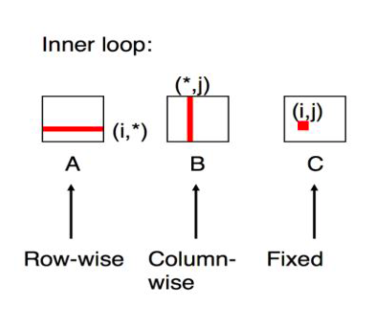

In [ ]:
public static int[][] ijkAlgorithm(int[][] A, int[][] B) {
    int n = A.length;
    int[][] C = new int[n][n];
    for (int i = 0; i < n; i++) {
        for (int j = 0; j < n; j++) {
            for (int k = 0; k < n; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
    return C;
}


**ikj algorithm**

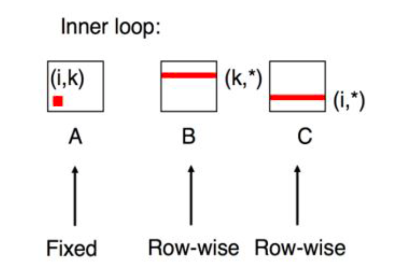

In [ ]:
public static int[][] ikjAlgorithm(int[][] A, int[][] B) {
    int n = A.length;
    int[][] C = new int[n][n];
    for (int i = 0; i < n; i++) {
        for (int k = 0; k < n; k++) {
            for (int j = 0; j < n; j++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
    return C;
}

In both the algorithm, matrices are either accessed in row-major format or column major format. **Row major accesses tend to improve the perfomance as it supports spatial locality because of strided refrence patterns. whereas column-major memory accesses tend to consume more cycles, as it is a cache miss for every new column it access.**


Incase of ijk algorithm, the matrix A is accessed row-wise and B is accessed column-wise. Wheras in ikj algorithm, element of A is fixed that means accessed repeatedly (temporal locality) and B is accesed row-wise.

**ikj alogrithm is cache friendly becuase it utilizes the benefits of both temporal and spatial locality to improve the hit rate**. Thus ultimately make the multiplication faster than the prior one.